<a href="https://colab.research.google.com/github/pouria1380-creator/st/blob/main/SpecialTopics_HM01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests

url = "https://business.yelp.com/external-assets/files/Yelp-JSON.zip"
filename = "Yelp-JSON.zip"

# Adding a User-Agent header to mimic a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

response = requests.get(url, stream=True, headers=headers)
response.raise_for_status() # Raise an exception for HTTP errors

with open(filename, 'wb') as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

print(f"Downloaded {filename} successfully.")

Downloaded Yelp-JSON.zip successfully.


In [ ]:
!unzip Yelp-JSON.zip
print("Extracted Yelp-JSON.zip successfully.")

Archive:  Yelp-JSON.zip
   creating: Yelp JSON/
  inflating: Yelp JSON/Yelp Dataset Documentation & ToS copy.pdf  
  inflating: __MACOSX/Yelp JSON/._Yelp Dataset Documentation & ToS copy.pdf  
  inflating: Yelp JSON/yelp_dataset.tar  
  inflating: __MACOSX/Yelp JSON/._yelp_dataset.tar  
Extracted Yelp-JSON.zip successfully.


In [ ]:
!tar -xf "Yelp JSON/yelp_dataset.tar" -C .

In [ ]:
!du -sh *

80K	Dataset_User_Agreement.pdf
16K	__MACOSX
55M	sample_data
114M	yelp_academic_dataset_business.json
274M	yelp_academic_dataset_checkin.json
5.0G	yelp_academic_dataset_review.json
173M	yelp_academic_dataset_tip.json
3.2G	yelp_academic_dataset_user.json
4.1G	Yelp JSON
4.1G	Yelp-JSON.zip


In [ ]:
import pandas as pd
import os
import random
import io

# Redefine the paths to the JSON files (assuming they are in the current directory)
business_file = 'yelp_academic_dataset_business.json'
review_file = 'yelp_academic_dataset_review.json'
user_file = 'yelp_academic_dataset_user.json'

# Define sampling rates
sample_rate_business = 0.50 # 50% for business file
sample_rate_large = 0.10    # 10% for review and user files

# --- Re-Sample and Load DataFrames ---
print(f"Re-sampling and loading {business_file} with rate {sample_rate_business*100}%...")
sampled_business_lines = []
with open(business_file, 'r', encoding='utf-8') as f:
    for line in f:
        if random.random() < sample_rate_business:
            sampled_business_lines.append(line)
df_business_sampled = pd.read_json(io.StringIO(''.join(sampled_business_lines)), lines=True)
print("df_business_sampled shape:", df_business_sampled.shape)

print(f"Re-sampling and loading {review_file} with rate {sample_rate_large*100}%...")
sampled_review_lines = []
with open(review_file, 'r', encoding='utf-8') as f:
    for line in f:
        if random.random() < sample_rate_large:
            sampled_review_lines.append(line)
df_review_sampled = pd.read_json(io.StringIO(''.join(sampled_review_lines)), lines=True)
print("df_review_sampled shape:", df_review_sampled.shape)

print(f"Re-sampling and loading {user_file} with rate {sample_rate_large*100}%...")
sampled_user_lines = []
with open(user_file, 'r', encoding='utf-8') as f:
    for line in f:
        if random.random() < sample_rate_large:
            sampled_user_lines.append(line)
df_user_sampled = pd.read_json(io.StringIO(''.join(sampled_user_lines)), lines=True)
print("df_user_sampled shape:", df_user_sampled.shape)

print("Sampled Yelp dataset files re-loaded into DataFrames successfully.")

# --- 1. Distribution of business ratings (stars) from df_business_sampled ---
print("\n--- 1. Distribution of business ratings (stars) from df_business_sampled ---")
dist_business_stars_sampled = df_business_sampled['stars'].value_counts().sort_index()
print("Distribution of Sampled Business Ratings:")
print(dist_business_stars_sampled)

# --- 2. Top 10 business categories by count from df_business_sampled ---
print("\n--- 2. Top 10 business categories by count from df_business_sampled ---")
# Filter out rows where 'categories' is None or NaN
df_business_sampled_clean_categories = df_business_sampled.dropna(subset=['categories'])

# Split categories string into a list of categories and then explode them into separate rows
all_categories_sampled = df_business_sampled_clean_categories['categories'].str.split(', ').explode()

# Count the occurrences of each category
category_counts_sampled = all_categories_sampled.value_counts()

# Get the top 10 most frequent categories
top_10_categories_sampled = category_counts_sampled.head(10)

print("Top 10 Sampled Business Categories:")
print(top_10_categories_sampled)

# --- 3. Distribution of review stars from df_review_sampled ---
print("\n--- 3. Distribution of review stars from df_review_sampled ---")
dist_review_stars_sampled = df_review_sampled['stars'].value_counts().sort_index()
print("Distribution of Sampled Review Stars:")
print(dist_review_stars_sampled)

# --- 4. Top 10 users by review count from df_user_sampled ---
print("\n--- 4. Top 10 users by review count from df_user_sampled ---")
top_10_users_by_review_count_sampled = df_user_sampled.sort_values(by='review_count', ascending=False).head(10)
print("Top 10 Sampled Users by Review Count:")
print(top_10_users_by_review_count_sampled[['name', 'review_count', 'average_stars']])

Re-sampling and loading yelp_academic_dataset_business.json with rate 50.0%...
df_business_sampled shape: (74934, 14)
Re-sampling and loading yelp_academic_dataset_review.json with rate 10.0%...
df_review_sampled shape: (698902, 9)
Re-sampling and loading yelp_academic_dataset_user.json with rate 10.0%...
df_user_sampled shape: (199174, 22)
Sampled Yelp dataset files re-loaded into DataFrames successfully.

--- 1. Distribution of business ratings (stars) from df_business_sampled ---
Distribution of Sampled Business Ratings:
stars
1.0      974
1.5     2480
2.0     4742
2.5     7128
3.0     9081
3.5    13348
4.0    15551
4.5    13499
5.0     8131
Name: count, dtype: int64

--- 2. Top 10 business categories by count from df_business_sampled ---
Top 10 Sampled Business Categories:
categories
Restaurants         26118
Food                13856
Shopping            12096
Home Services        7216
Beauty & Spas        7085
Nightlife            6120
Health & Medical     5899
Local Services     


--- 1. Distribution of business ratings (stars) from df_business ---
Distribution of Business Ratings:
stars
1.0      974
1.5     2480
2.0     4742
2.5     7128
3.0     9081
3.5    13348
4.0    15551
4.5    13499
5.0     8131
Name: count, dtype: int64

--- 2. Top 10 business categories by count from df_business ---
Top 10 Business Categories:
categories
Restaurants         26118
Food                13856
Shopping            12096
Home Services        7216
Beauty & Spas        7085
Nightlife            6120
Health & Medical     5899
Local Services       5599
Bars                 5492
Automotive           5345
Name: count, dtype: int64

--- 3. Distribution of review stars from df_review ---
Distribution of Review Stars:
stars
1    107237
2     54348
3     69237
4    144754
5    323326
Name: count, dtype: int64

--- 4. Top 10 users by review count from df_user ---
Top 10 Users by Review Count:
         name  review_count  average_stars
382    Nijole          8363           3.75
722    Ge

/tmp/ipython-input-148325016.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_business['stars'], palette='viridis')


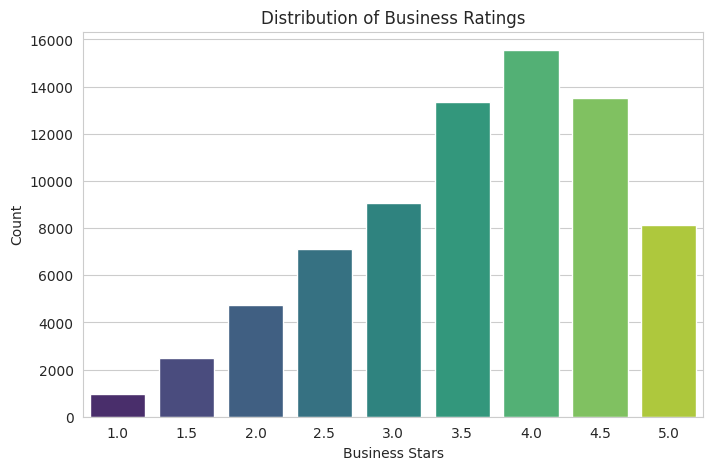

/tmp/ipython-input-148325016.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='mako')


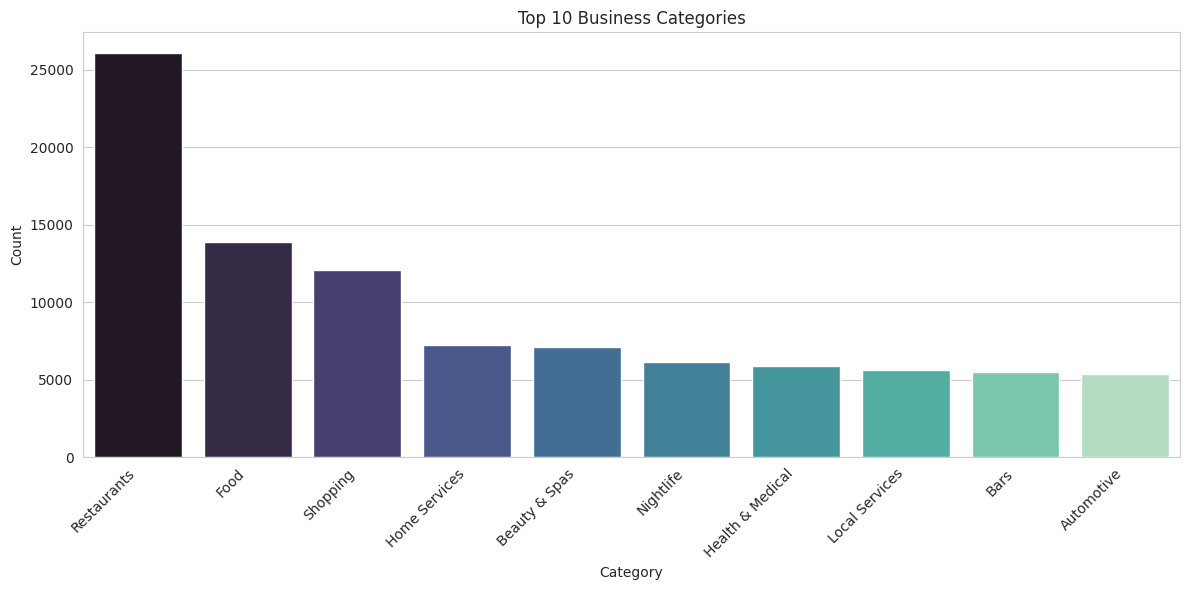

/tmp/ipython-input-148325016.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_review['stars'], palette='magma')


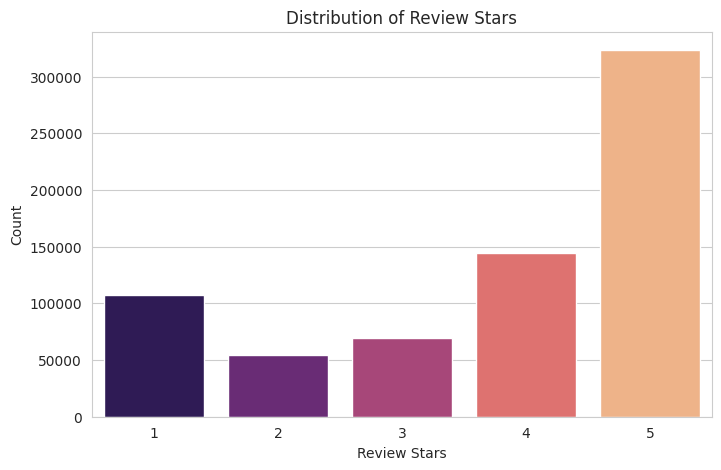

/tmp/ipython-input-148325016.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_users_by_review_count['name'], y=top_10_users_by_review_count['review_count'], palette='rocket')


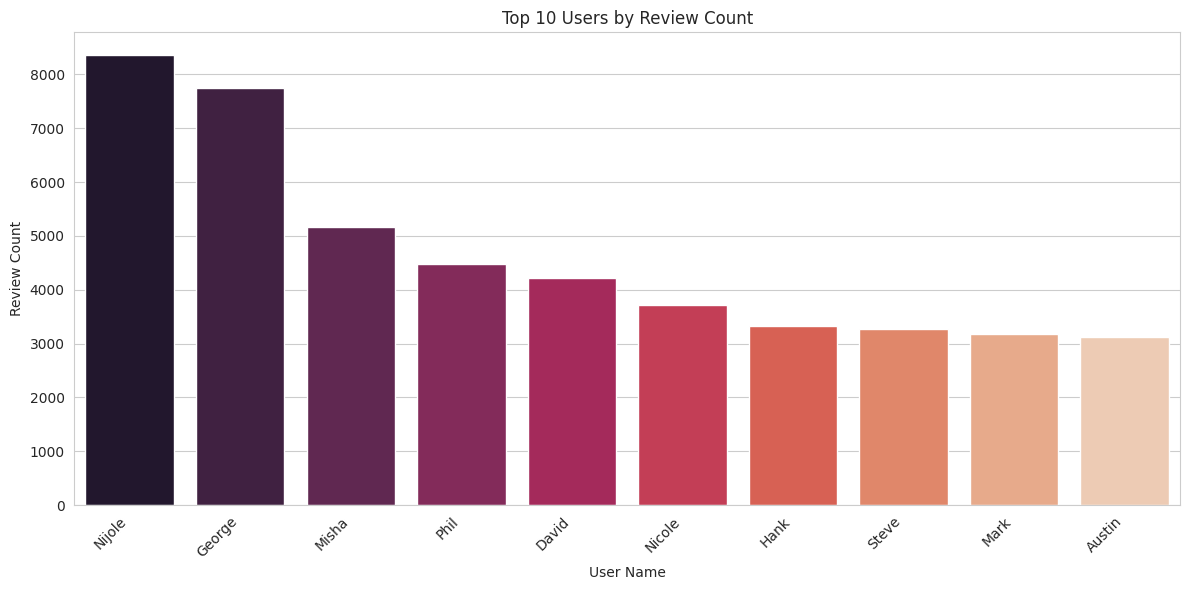

Visualizations generated successfully.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# # Redefine the paths to the JSON files (assuming they are in the current directory)
# business_file = 'yelp_academic_dataset_business.json'
# review_file = 'yelp_academic_dataset_review.json'
# user_file = 'yelp_academic_dataset_user.json'

# # Re-load the business data
# print(f"\nLoading {business_file}...")
# df_business = pd.read_json(business_file, lines=True)
# print("df_business shape:", df_business.shape)

# # Re-load the review data
# print(f"\nLoading {review_file}...")
# df_review = pd.read_json(review_file, lines=True)
# print("df_review shape:", df_review.shape)

# # Re-load the user data
# print(f"\nLoading {user_file}...")
# df_user = pd.read_json(user_file, lines=True)
# print("df_user shape:", df_user.shape)

# print("All primary Yelp dataset JSON files loaded into DataFrames successfully.")

df_review=df_review_sampled
df_business=df_business_sampled
df_user=df_user_sampled
# --- 1. Distribution of business ratings (stars) from df_business ---
print("\n--- 1. Distribution of business ratings (stars) from df_business ---")
dist_business_stars = df_business['stars'].value_counts().sort_index()
print("Distribution of Business Ratings:")
print(dist_business_stars)

# --- 2. Top 10 business categories by count from df_business ---
print("\n--- 2. Top 10 business categories by count from df_business ---")
# Filter out rows where 'categories' is None or NaN
df_business_clean_categories = df_business.dropna(subset=['categories'])

# Split categories string into a list of categories and then explode them into separate rows
all_categories = df_business_clean_categories['categories'].str.split(', ').explode()

# Count the occurrences of each category
category_counts = all_categories.value_counts()

# Get the top 10 most frequent categories
top_10_categories = category_counts.head(10)

print("Top 10 Business Categories:")
print(top_10_categories)

# --- 3. Distribution of review stars from df_review ---
print("\n--- 3. Distribution of review stars from df_review ---")
dist_review_stars = df_review['stars'].value_counts().sort_index()
print("Distribution of Review Stars:")
print(dist_review_stars)

# --- 4. Top 10 users by review count from df_user ---
print("\n--- 4. Top 10 users by review count from df_user ---")
top_10_users_by_review_count = df_user.sort_values(by='review_count', ascending=False).head(10)
print("Top 10 Users by Review Count:")
print(top_10_users_by_review_count[['name', 'review_count', 'average_stars']])

# Set plot style
sns.set_style("whitegrid")

# 1. Visualize the distribution of business ratings
plt.figure(figsize=(8, 5))
sns.countplot(x=df_business['stars'], palette='viridis')
plt.title('Distribution of Business Ratings')
plt.xlabel('Business Stars')
plt.ylabel('Count')
plt.show()

# 2. Visualize the top 10 business categories
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categories.index, y=top_10_categories.values, palette='mako')
plt.title('Top 10 Business Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Visualize the distribution of review stars
plt.figure(figsize=(8, 5))
sns.countplot(x=df_review['stars'], palette='magma')
plt.title('Distribution of Review Stars')
plt.xlabel('Review Stars')
plt.ylabel('Count')
plt.show()

# 4. Visualize the top 10 users by review count
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_users_by_review_count['name'], y=top_10_users_by_review_count['review_count'], palette='rocket')
plt.title('Top 10 Users by Review Count')
plt.xlabel('User Name')
plt.ylabel('Review Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Visualizations generated successfully.")

=== Scenario 1: Line Chart - User Activity Trend ===


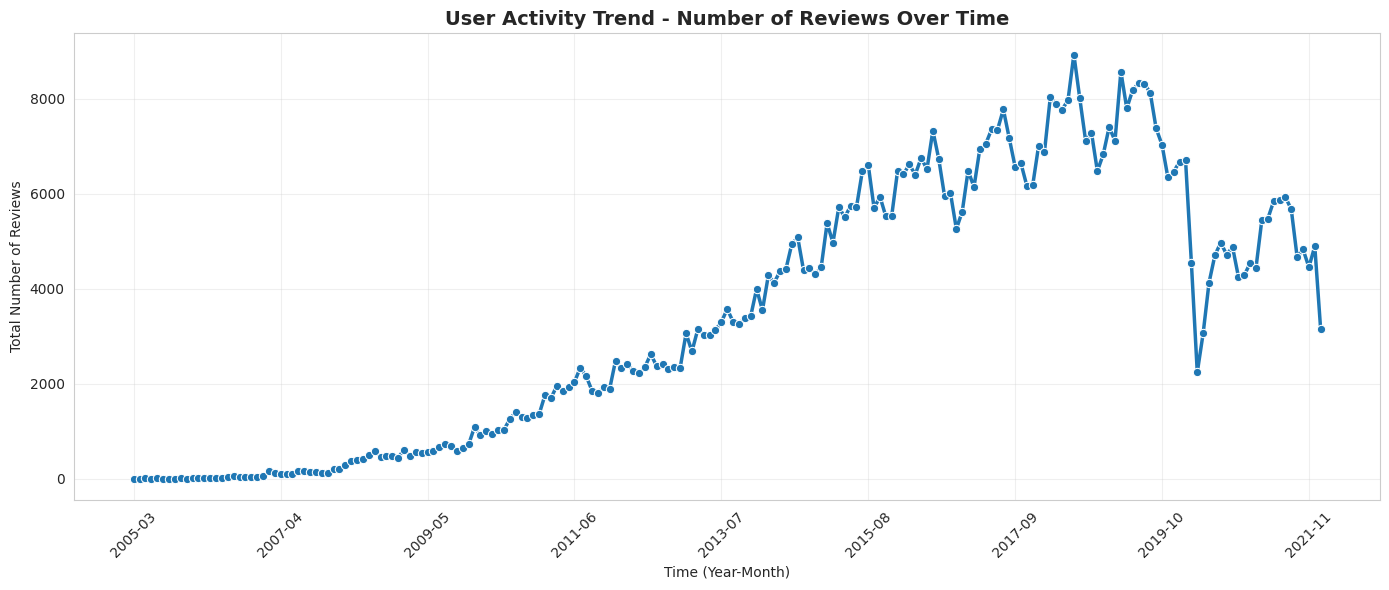

Time period covered: 2005-03 to 2022-01
Total months in dataset: 203
Average reviews per month: 3443


In [ ]:
# Scenario 1: Line Chart - User Activity Trend
print("=== Scenario 1: Line Chart - User Activity Trend ===")

# Convert date column to datetime
df_review['date'] = pd.to_datetime(df_review['date'])

# Group by year-month and count reviews
monthly_reviews = df_review.groupby(df_review['date'].dt.to_period('M')).size().reset_index(name='review_count')
monthly_reviews['date_str'] = monthly_reviews['date'].astype(str)

# Create line plot with better x-axis formatting
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_reviews, x='date_str', y='review_count', marker='o', linewidth=2.5)
plt.title('User Activity Trend - Number of Reviews Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Total Number of Reviews')

# Improve x-axis readability - show every 6 months or fewer labels
n = len(monthly_reviews)
step = max(1, n // 8)  # Show approximately 8 labels
plt.xticks(range(0, n, step), monthly_reviews['date_str'].iloc[range(0, n, step)], rotation=45)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Also show some statistics
print(f"Time period covered: {monthly_reviews['date_str'].iloc[0]} to {monthly_reviews['date_str'].iloc[-1]}")
print(f"Total months in dataset: {len(monthly_reviews)}")
print(f"Average reviews per month: {monthly_reviews['review_count'].mean():.0f}")

=== Scenario 2: Scatter Plot - Relationship between Popularity and Quality ===


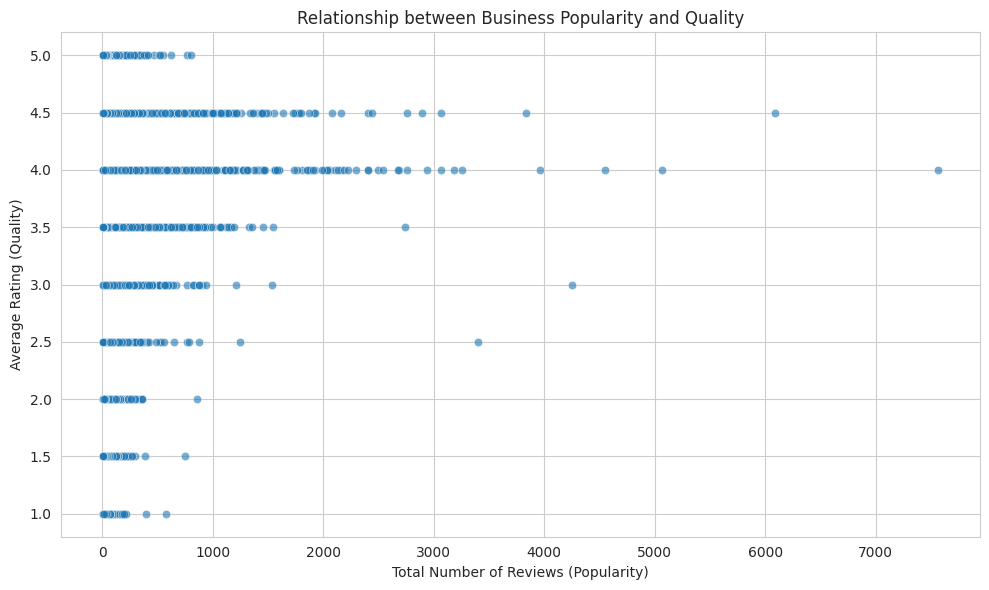

In [ ]:
# Scenario 2: Scatter Plot - Relationship between Popularity and Quality
print("=== Scenario 2: Scatter Plot - Relationship between Popularity and Quality ===")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_business, x='review_count', y='stars', alpha=0.6)
plt.title('Relationship between Business Popularity and Quality')
plt.xlabel('Total Number of Reviews (Popularity)')
plt.ylabel('Average Rating (Quality)')
plt.tight_layout()
plt.show()

=== Scenario 3: Rel Plot - Comparison between Two Cities ===


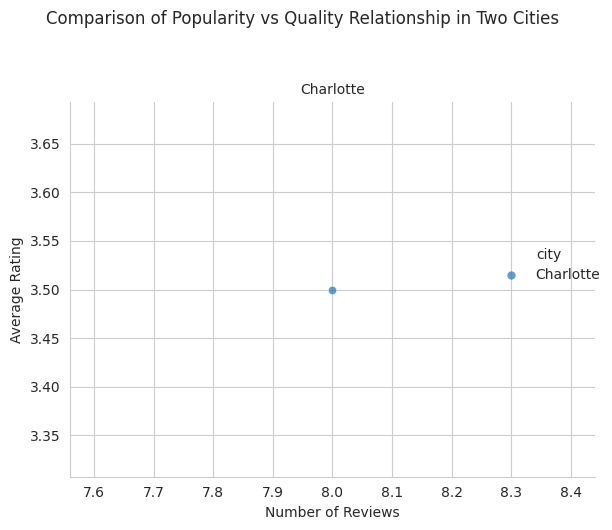

In [ ]:
# Scenario 3: Rel Plot - Comparison between Two Cities
print("=== Scenario 3: Rel Plot - Comparison between Two Cities ===")

# Filter data for two major cities
cities_to_compare = ['Phoenix', 'Charlotte']
df_cities = df_business[df_business['city'].isin(cities_to_compare)]

# Create relplot
g = sns.relplot(data=df_cities, x='review_count', y='stars',
                hue='city', col='city', kind='scatter', alpha=0.7)
g.set_axis_labels('Number of Reviews', 'Average Rating')
g.set_titles("{col_name}")
plt.suptitle('Comparison of Popularity vs Quality Relationship in Two Cities', y=1.05)
plt.tight_layout()
plt.show()

=== Scenario 4: Bar Plot - Quality Comparison by Price Range ===


/tmp/ipython-input-2553730624.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants_with_price['price_range'] = restaurants_with_price['attributes'].apply(extract_price)
/tmp/ipython-input-2553730624.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=restaurants_with_price, x='price_range', y='stars',


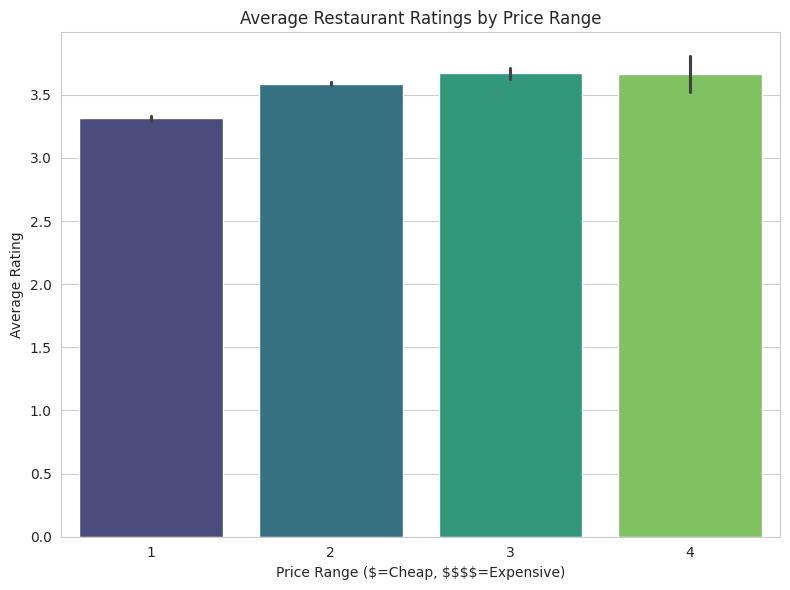

In [ ]:
# Scenario 4: Bar Plot - Quality Comparison by Price Range
print("=== Scenario 4: Bar Plot - Quality Comparison by Price Range ===")

# Filter restaurants and extract price info
restaurants = df_business[df_business['categories'].str.contains('Restaurant', na=False)]
restaurants_with_price = restaurants.dropna(subset=['attributes'])

# Extract price range from attributes
def extract_price(attr):
    if isinstance(attr, dict) and 'RestaurantsPriceRange2' in attr:
        return attr['RestaurantsPriceRange2']
    return None

restaurants_with_price['price_range'] = restaurants_with_price['attributes'].apply(extract_price)
restaurants_with_price = restaurants_with_price.dropna(subset=['price_range'])

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=restaurants_with_price, x='price_range', y='stars',
            order=['1', '2', '3', '4'], palette='viridis')
plt.title('Average Restaurant Ratings by Price Range')
plt.xlabel('Price Range ($=Cheap, $$$$=Expensive)')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

=== Scenario 5: Count Plot - Distribution of User Ratings ===


/tmp/ipython-input-2812069456.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_review, x='stars', palette='Set2')


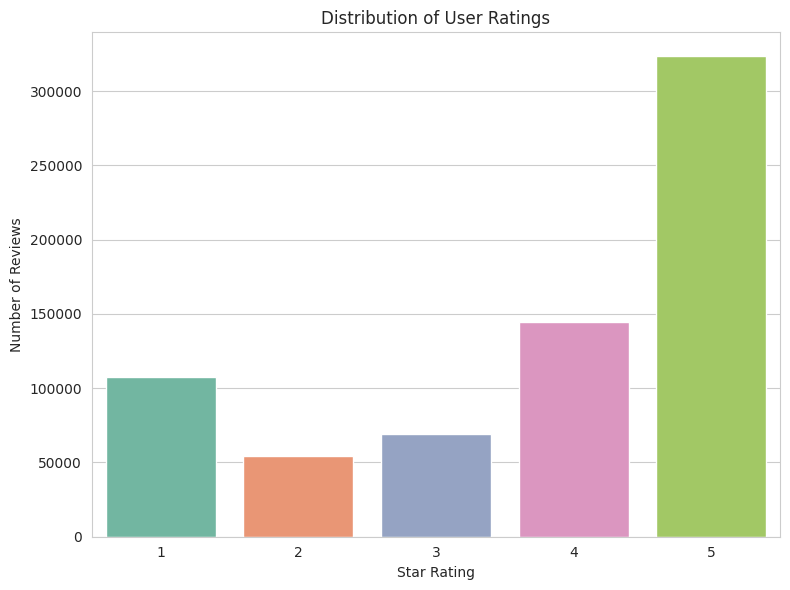

In [ ]:
# Scenario 5: Count Plot - Distribution of User Ratings
print("=== Scenario 5: Count Plot - Distribution of User Ratings ===")

plt.figure(figsize=(8, 6))
sns.countplot(data=df_review, x='stars', palette='Set2')
plt.title('Distribution of User Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

=== Scenario 6: Cat Plot - Rating Distribution across Food Categories ===


/tmp/ipython-input-1193579120.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_businesses['primary_category'] = food_businesses['categories'].apply(


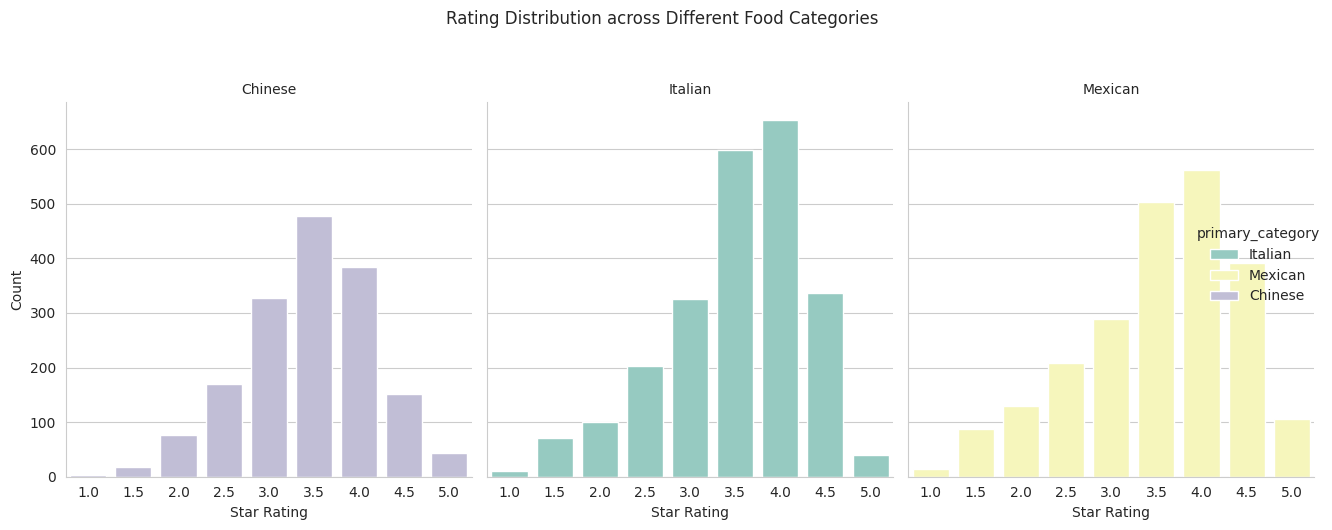

In [ ]:
# Scenario 6: Cat Plot - Rating Distribution across Food Categories
print("=== Scenario 6: Cat Plot - Rating Distribution across Food Categories ===")

# Define popular food categories
food_categories = ['Italian', 'Mexican', 'Chinese']

# Filter businesses for these categories
food_businesses = df_business[df_business['categories'].str.contains('|'.join(food_categories), na=False)]

# Extract primary category
def get_primary_category(cats, target_categories):
    if pd.isna(cats):
        return None
    for cat in target_categories:
        if cat in cats:
            return cat
    return None

food_businesses['primary_category'] = food_businesses['categories'].apply(
    lambda x: get_primary_category(x, food_categories))
food_businesses = food_businesses.dropna(subset=['primary_category'])

# Create catplot
g = sns.catplot(data=food_businesses, x='stars', hue='primary_category',
                col='primary_category', kind='count', palette='Set3', height=5, aspect=0.8)
g.set_axis_labels('Star Rating', 'Count')
g.set_titles("{col_name}")
plt.suptitle('Rating Distribution across Different Food Categories', y=1.05)
plt.tight_layout()
plt.show()

=== Scenario 7: Dist Plot - Distribution of User Activity ===


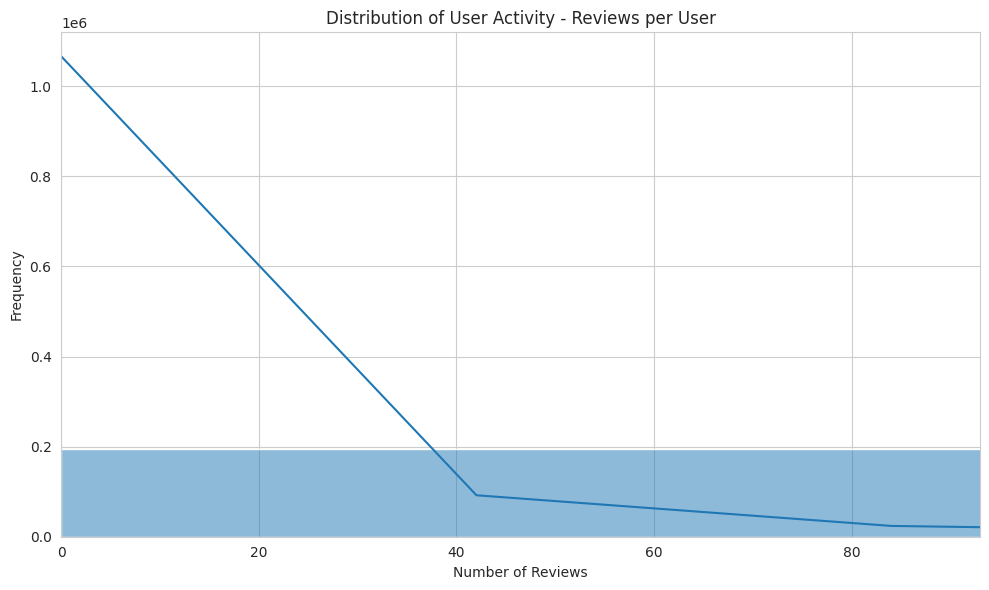

In [ ]:
# Scenario 7: Dist Plot - Distribution of User Activity
print("=== Scenario 7: Dist Plot - Distribution of User Activity ===")

plt.figure(figsize=(10, 6))
sns.histplot(data=df_user, x='review_count', kde=True, bins=50)
plt.title('Distribution of User Activity - Reviews per User')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.xlim(0, df_user['review_count'].quantile(0.95))  # Remove extreme outliers for better visualization
plt.tight_layout()
plt.show()

=== Scenario 8: KDE Plot - Density Distribution of Ratings ===


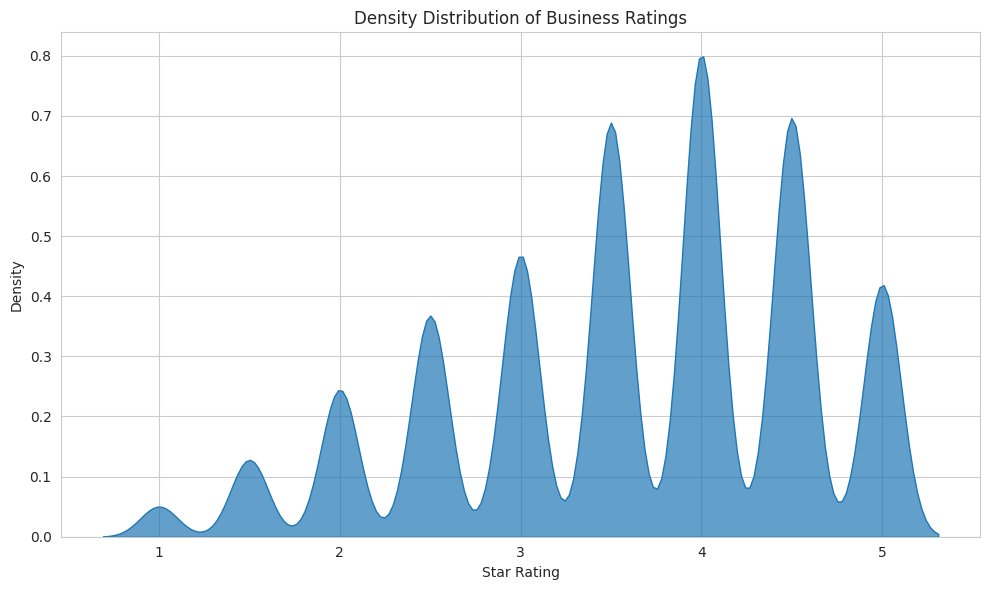

In [ ]:
# Scenario 8: KDE Plot - Density Distribution of Ratings
print("=== Scenario 8: KDE Plot - Density Distribution of Ratings ===")

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_business, x='stars', fill=True, alpha=0.7)
plt.title('Density Distribution of Business Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

=== Scenario 9: Swarm Plot - Rating Distribution across Business Categories ===


/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 22.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


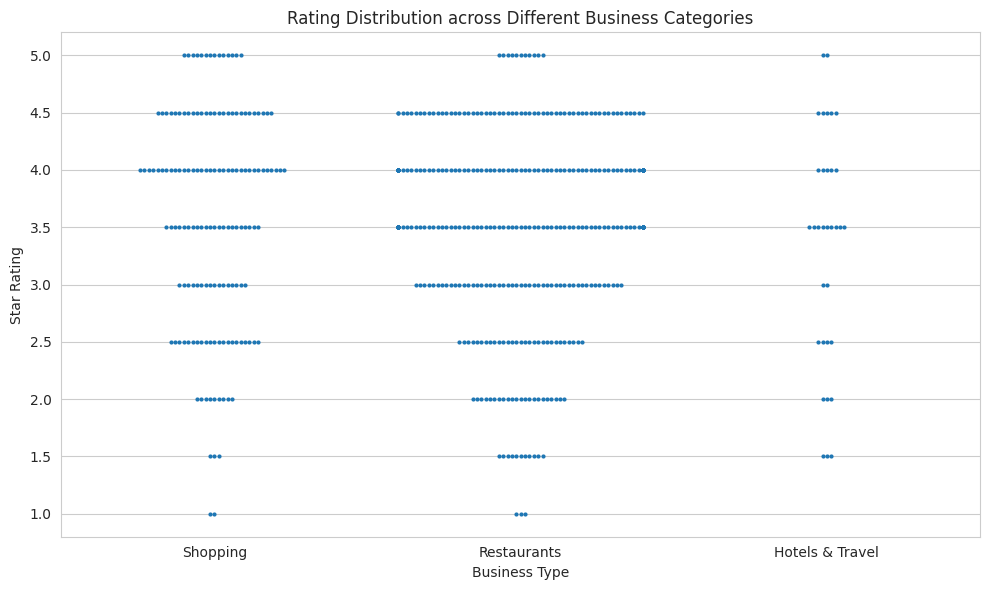

In [ ]:
# Scenario 9: Swarm Plot - Rating Distribution across Business Categories
print("=== Scenario 9: Swarm Plot - Rating Distribution across Business Categories ===")

# Define business categories
business_categories = ['Restaurants', 'Shopping', 'Hotels & Travel']

# Filter and sample for better visualization
def get_business_type(cats, target_categories):
    if pd.isna(cats):
        return None
    for cat in target_categories:
        if cat in cats:
            return cat
    return None

business_sample = df_business.sample(n=1000, random_state=42)  # Sample for swarm plot
business_sample['business_type'] = business_sample['categories'].apply(
    lambda x: get_business_type(x, business_categories))
business_sample = business_sample.dropna(subset=['business_type'])

plt.figure(figsize=(10, 6))
sns.swarmplot(data=business_sample, x='business_type', y='stars', size=3)
plt.title('Rating Distribution across Different Business Categories')
plt.xlabel('Business Type')
plt.ylabel('Star Rating')
plt.tight_layout()
plt.show()

=== Scenario 10: Strip Plot - Rating Distribution across Cities (Neighborhood column not found) ===


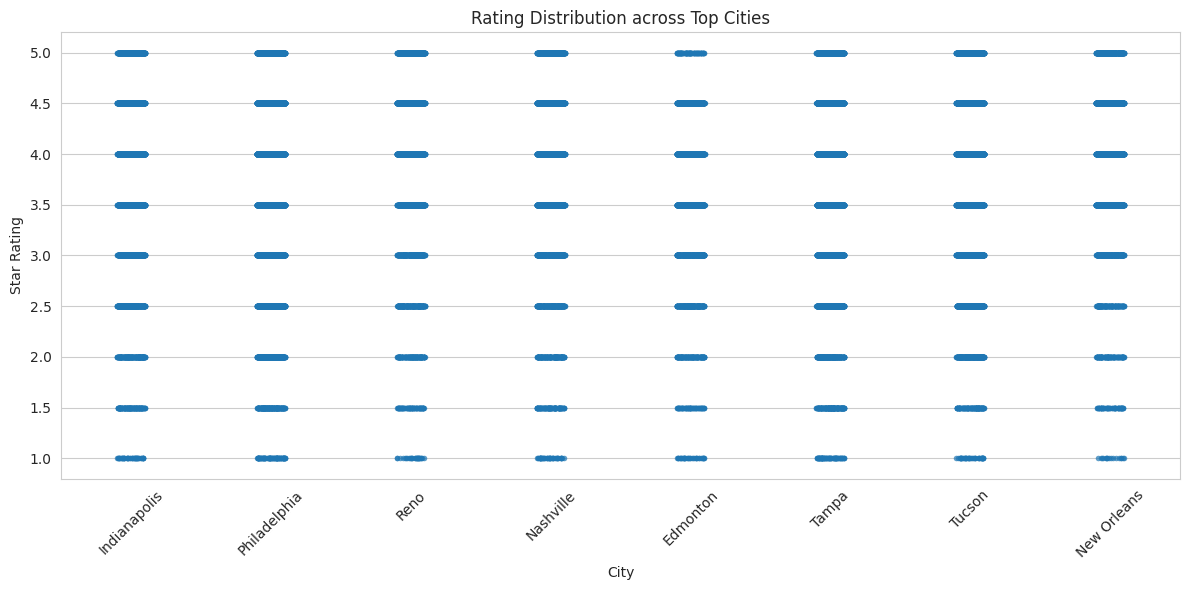

In [ ]:
# Scenario 10: Strip Plot - Rating Distribution across Cities (Neighborhood column not found)
print("=== Scenario 10: Strip Plot - Rating Distribution across Cities (Neighborhood column not found) ===")

# The original 'neighborhood' column is not available in df_business.
# We will use 'city' for grouping for demonstration purposes, comparing multiple cities.

# Select top cities for comparison
top_cities_to_compare = df_business['city'].value_counts().head(8).index.tolist()
df_cities_for_plot = df_business[df_business['city'].isin(top_cities_to_compare)]

plt.figure(figsize=(12, 6))
sns.stripplot(data=df_cities_for_plot, x='city', y='stars',
              jitter=True, alpha=0.7, size=4)
plt.title(f'Rating Distribution across Top Cities')
plt.xlabel('City')
plt.ylabel('Star Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== Scenario 11: Box Plot - Popularity Distribution across Business Categories ===


/tmp/ipython-input-710855713.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=business_cat, x='category', y='review_count', palette='Set2')


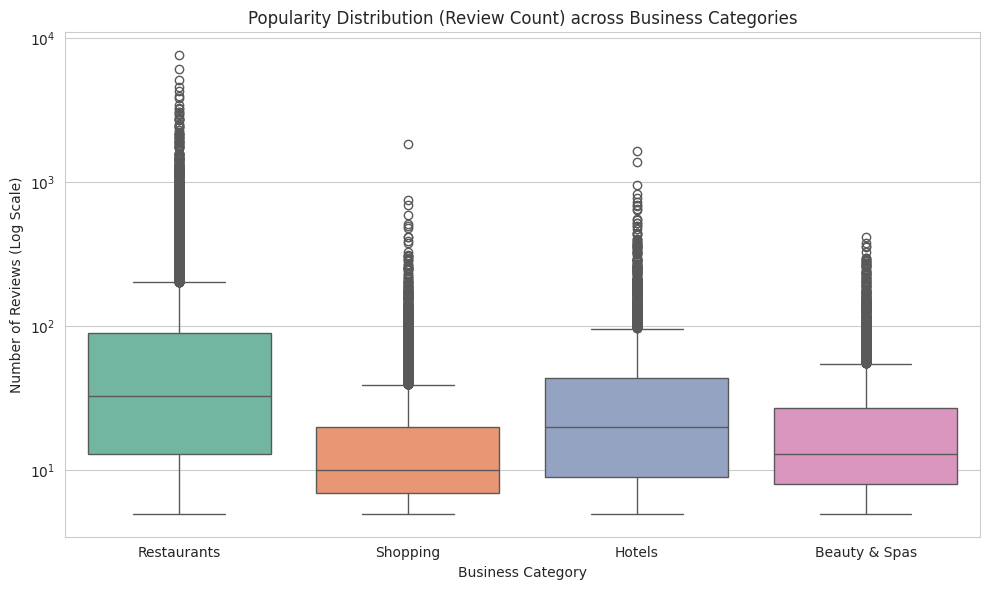

In [ ]:
# Scenario 11: Box Plot - Popularity Distribution across Business Categories
print("=== Scenario 11: Box Plot - Popularity Distribution across Business Categories ===")

# Define business categories
categories_for_box = ['Restaurants', 'Shopping', 'Hotels', 'Beauty & Spas']

# Filter businesses
def get_business_category(cats, target_categories):
    if pd.isna(cats):
        return None
    for cat in target_categories:
        if cat in cats:
            return cat
    return None

business_cat = df_business.copy()
business_cat['category'] = business_cat['categories'].apply(
    lambda x: get_business_category(x, categories_for_box))
business_cat = business_cat.dropna(subset=['category'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=business_cat, x='category', y='review_count', palette='Set2')
plt.yscale('log')  # Use log scale due to large outliers
plt.title('Popularity Distribution (Review Count) across Business Categories')
plt.xlabel('Business Category')
plt.ylabel('Number of Reviews (Log Scale)')
plt.tight_layout()
plt.show()

=== Scenario 12: Pair Plot - Relationships between User Variables ===


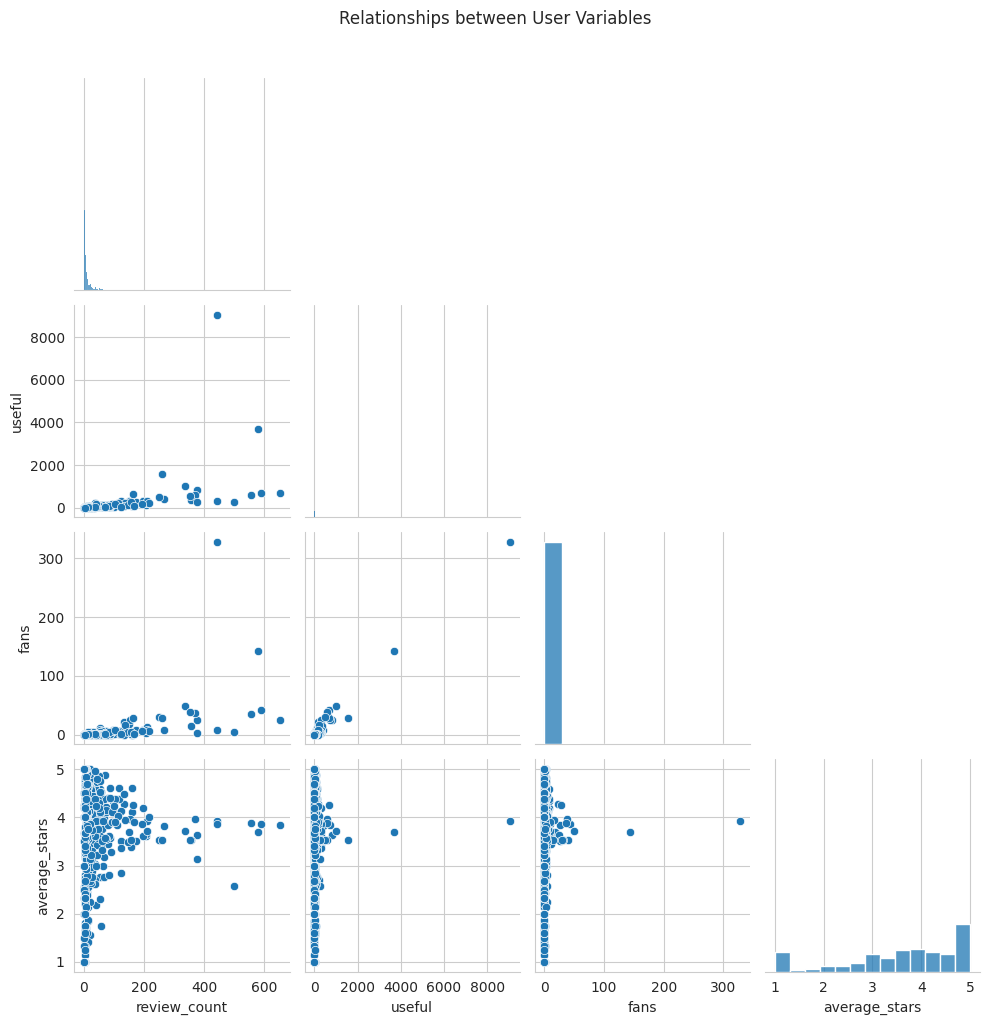

In [ ]:
# Scenario 12: Pair Plot - Relationships between User Variables
print("=== Scenario 12: Pair Plot - Relationships between User Variables ===")

# Select numerical variables for users
user_vars = ['review_count', 'useful', 'fans', 'average_stars']
user_sample = df_user[user_vars].dropna().sample(n=1000, random_state=42)  # Sample for performance

g = sns.pairplot(data=user_sample, diag_kind='hist', corner=True)
plt.suptitle('Relationships between User Variables', y=1.02)
plt.tight_layout()
plt.show()

=== Scenario 13: Reg Plot - Linear Relationship between Popularity and Quality ===


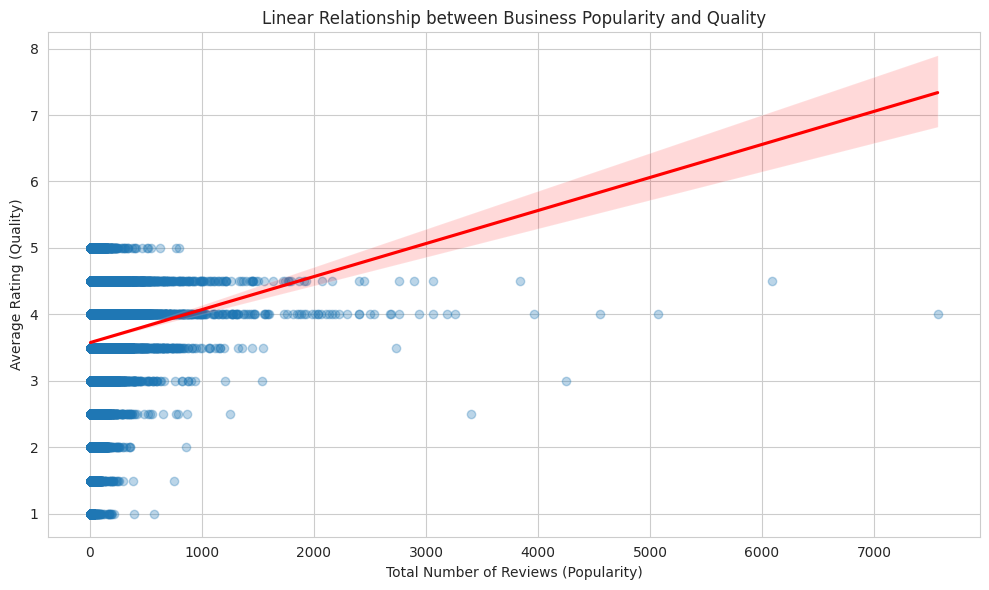

In [ ]:
# Scenario 13: Reg Plot - Linear Relationship between Popularity and Quality
print("=== Scenario 13: Reg Plot - Linear Relationship between Popularity and Quality ===")

plt.figure(figsize=(10, 6))
sns.regplot(data=df_business, x='review_count', y='stars',
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Linear Relationship between Business Popularity and Quality')
plt.xlabel('Total Number of Reviews (Popularity)')
plt.ylabel('Average Rating (Quality)')
plt.tight_layout()
plt.show()

=== Scenario 14: Joint Plot - Popularity vs Quality with Marginal Distributions ===


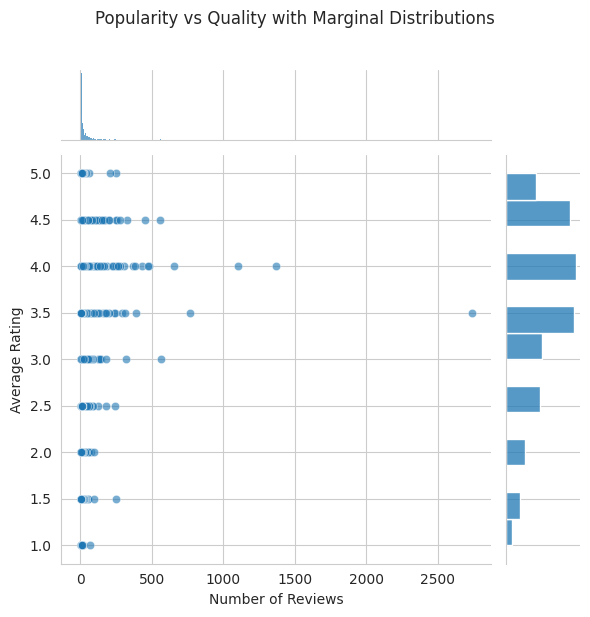

In [ ]:
# Scenario 14: Joint Plot - Popularity vs Quality with Marginal Distributions
print("=== Scenario 14: Joint Plot - Popularity vs Quality with Marginal Distributions ===")

# Sample for better performance
business_sample = df_business.sample(n=1000, random_state=42)

g = sns.jointplot(data=business_sample, x='review_count', y='stars',
                  kind='scatter', alpha=0.6)
g.fig.suptitle('Popularity vs Quality with Marginal Distributions', y=1.02)
g.set_axis_labels('Number of Reviews', 'Average Rating')
plt.tight_layout()
plt.show()

=== Scenario 15: Heat Map - Correlation Matrix of User Variables ===


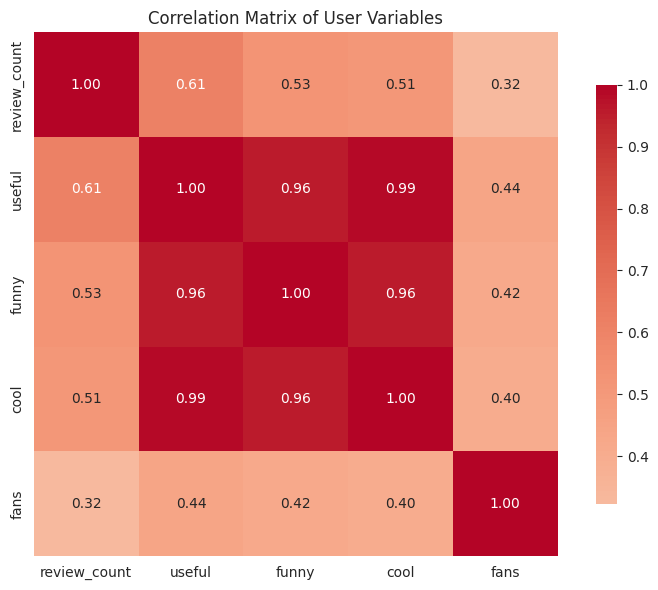

In [ ]:
# Scenario 15: Heat Map - Correlation Matrix of User Variables
print("=== Scenario 15: Heat Map - Correlation Matrix of User Variables ===")

# Select user variables for correlation
user_corr_vars = ['review_count', 'useful', 'funny', 'cool', 'fans']
user_corr_data = df_user[user_corr_vars].dropna()

# Calculate correlation matrix
corr_matrix = user_corr_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of User Variables')
plt.tight_layout()
plt.show()